# Enquête Digit_hum

 Sondage : Manipuler des données en Sciences Humaines et Sociales (SHS) : R, Python, ou autre ?
 
- Diffusion 27 mars 2023
- Premier traitement : courant mai

### Points à discuter

- comment recoder les disciplines ?

## Chargement des bibliothèques & données

In [1]:
import pandas as pd
import pyshs

In [44]:
data = pd.read_csv("./manipuler_des_donnees_en_sciences_humaines_et_sociales_shs___r_python_ou_autre_2023_05_03.csv",sep=";",
                   skiprows=[0,1])

import json
#json.dump(reco,open("./reco_columns.json","w"))
reco = json.load(open("./reco_columns.json","r"))
data = data.rename(columns= reco)
data = data.drop(columns="drop")
data.shape

(216, 80)

## Nettoyer les données

In [5]:
data.columns

Index(['heure', 'genre', 'statut', 'autre', 'contrat', 'age',
       'disc_Anthropologie', 'disc_Archéologie', 'disc_Economie',
       'disc_Géographie', 'disc_Histoire', 'disc_Linguistique',
       'disc_Littérature', 'disc_Philosophie', 'disc_Psychologie',
       'disc_Sociologie', 'disc_Autre', 'prog_A+', 'prog_Bash', 'prog_C',
       'prog_Java', 'prog_JavaScript', 'prog_Julia', 'prog_Pascal',
       'prog_Perl', 'prog_PHP', 'prog_Python', 'prog_R', 'prog_Rust',
       'prog_Swift', 'prog_SQL', 'prog_Autre', 'prog_Autre_lang',
       'donnees_Image', 'donnees_Son', 'donnees_Vidéo', 'donnees_Texte',
       'donnees_Géographique', 'donnees_Numérique', 'donnees_autres',
       'entendu_python', 'familiarite_python', 'experience_python',
       'activite_python', 'niveau_python', 'pratique_python',
       'exemples_python', 'temps_python', 'collegues_python',
       'traitements_python', 'ressources_python', 'entendu_r', 'familiarite_r',
       'experience_r', 'activite_r', 'niveau_r',

In [45]:
f_missing = data["age"].notna()
data = data[f_missing] #enlever si l'âge n'est pas mentionné

reco = {"Je l'utilise, à un niveau débutant":"2-usage débutant",
       "Je l'utilise, à un niveau intermédiaire":"3-usage intermédiaire",
       "J'en ai juste entendu parlé":"1-entendu parlé", "Je l'utilise, à un niveau avancé":"4-usage avancé",
       "J'en ai juste entendu parler":"1-entendu parlé","Je ne connais pas":"NA"}
reco = {"Je l'utilise, à un niveau débutant":"2. Use it (beginner)",
       "Je l'utilise, à un niveau intermédiaire":"3. Use it (intermediary)",
       "J'en ai juste entendu parlé":"1. Heard about it", "Je l'utilise, à un niveau avancé":"4. Use it (advanced)",
       "J'en ai juste entendu parler":"1. Heard about it","Je ne connais pas":"0. Don't know"}
data["familiarite_python"] = data["familiarite_python"].replace(reco).fillna("NA")
data["familiarite_notebook"] = data["familiarite_notebook"].replace(reco).fillna("0. Don't know")
data["familiarite_r"] = data["familiarite_r"].replace(reco).fillna("NA")
reco = {'46 - 55 ans': '5. 46 - 55',
 '26 - 35 ans': '2. 26 - 35',
 'Moins de 25 ans': '1. <25',
 '36 - 45 ans': '3. 36 - 45',
 'Plus de 56 ans': '5. >56'}
data["age"] = data["age"].replace(reco)

reco = {"Oui, à la fois pour la recherche et pour l'enseignement":"4. Teaching and research",
       'Oui, pour la recherche':"2. Only research", 'Non':"1. No", "Oui, pour l'enseignement":"3. Only teaching"}
data["experience_notebook"] = data["experience_notebook"].replace(reco)

reco = {'0 à 3 ans':"0-3",  '3 à 5 ans':"3-5", '5 à 10 ans':"5-10"}
data["temps_notebook"] = data["temps_notebook"].replace(reco)

reco = {'Oui, un peu':"2. Yes, a few", 'Oui, beaucoup':"3. Yes, a lot", 'Non':"1. No"}
data["collegue_notebook"] = data["collegue_notebook"].replace(reco)

reco = {'Oui, plutôt':"2-Oui, plutôt", 'Oui, beaucoup':"3-Oui, beaucoup", 'Je ne sais pas':"4-NSP",
       'Non, pas du tout':"1-Non, pas du tout"}
data["progsci_shs"] = data["progsci_shs"].replace(reco)

## Description échantillon

In [6]:
pyshs.tri_a_plat(data,"age")

,Effectif,Pourcentage (%)
1. <25,19.0,9.2
2. 26 - 35,80.0,38.8
3. 36 - 45,51.0,24.8
5. 46 - 55,39.0,18.9
5. >56,17.0,8.3
Total,206.0,100.0


In [7]:
pyshs.tri_a_plat(data,"genre")

,Effectif,Pourcentage (%)
Autre,6.0,2.9
F,102.0,50.0
H,96.0,47.1
Total,204.0,100.0


In [8]:
pyshs.tri_a_plat(data,"statut")

,Effectif,Pourcentage (%)
Chercheur,23.0,11.2
Doctorant,45.0,21.8
Enseignant-chercheur,39.0,18.9
Etudiant (jusqu'au master 2),19.0,9.2
Ingénieur d'études,45.0,21.8
Ingénieur de recherche,18.0,8.7
Post-doctorant,17.0,8.3
Total,206.0,99.9


In [9]:
pyshs.tri_a_plat(data,"contrat")

,Effectif,Pourcentage (%)
CDI de droit privé,16.0,8.2
Non titulaire (CDD),84.0,42.9
Titulaire de la fonction publique,96.0,49.0
Total,196.0,100.1


In [11]:
{i:round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "disc_" in i}

{'disc_Anthropologie': 10.2,
 'disc_Archéologie': 15.5,
 'disc_Economie': 2.9,
 'disc_Géographie': 9.2,
 'disc_Histoire': 33.0,
 'disc_Linguistique': 25.2,
 'disc_Littérature': 22.8,
 'disc_Philosophie': 9.2,
 'disc_Psychologie': 3.9,
 'disc_Sociologie': 27.2,
 'disc_Autre': 24.8}

Recoder les disciplines !!!!

In [12]:
list(data["disc_Autre"].dropna())

['Littérature italienne',
 'Religion/Théologie',
 'Science politique',
 'Sciences Politiques',
 'Humanités numériques ',
 "Sciences de l'Information et de la Communication",
 "Sciences de l'information et des bibliothèques",
 'STS',
 "Histoire de l'art\r\r\nHumanités numériques",
 'Histoire du droit/philosphie du droit ',
 'information et communication',
 "Sciences de l'information et de la communication",
 'Interactions humain-machine',
 "dcience de l'info-com / media studies",
 'Traitement Automatique des Langues Naturelles',
 "science and technology studies (STS), sciences de l'information et de la communication (SIC)",
 "Sciences de l'antiquité en général",
 'Humanités Numériques',
 'numismate',
 "plutôt généraliste en Sciences de l'information, humanités numériques\r\r\n\r\r\navec une orientation récente (3 ans) autour de la philologie, musicologie...",
 'Démographie',
 'archéométrie',
 'Arts du spectacle',
 'Histoire des sciences, mathématiques',
 "Sciences de l'information et de

Usage des langages de programmation (%)

In [13]:
pd.Series({i:round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "prog_" in i}).sort_values()

prog_A+             0.0
prog_Swift          0.0
prog_Julia          1.0
prog_Rust           1.9
prog_Pascal         4.4
prog_Perl          11.2
prog_Java          13.6
prog_C             14.6
prog_Autre         15.5
prog_Bash          24.3
prog_PHP           24.8
prog_Autre_lang    24.8
prog_JavaScript    27.2
prog_SQL           45.1
prog_R             55.3
prog_Python        63.6
dtype: float64

Type de données utilisées (%)

In [15]:
pd.Series({i:round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "donnees_" in i}).sort_values()

donnees_autres           6.8
donnees_Vidéo            7.8
donnees_Son              9.7
donnees_Géographique    22.8
donnees_Image           38.3
donnees_Numérique       47.6
donnees_Texte           92.2
dtype: float64

Plus de programmation scientifique ?

In [46]:

pyshs.tri_a_plat(data,"progsci_shs")

,Effectif,Pourcentage (%)
"1-Non, pas du tout",4.0,2.1
"2-Oui, plutôt",79.0,41.8
"3-Oui, beaucoup",88.0,46.6
4-NSP,18.0,9.5
Total,189.0,100.0


## Usages de Python & R

In [21]:
pd.concat({"Entendu Python":pyshs.tri_a_plat(data,"entendu_python"),
"Entendu R":pyshs.tri_a_plat(data,"entendu_r")},axis=1)

Entendu Python                 Entendu R                
            Effectif Pourcentage (%)  Effectif Pourcentage (%)
Non              7.0             3.4      15.0             7.3
Oui            199.0            96.6     191.0            92.7
Total          206.0           100.0     206.0           100.0

In [22]:
pd.concat({"Familiarité Python":pyshs.tri_a_plat(data,"familiarite_python"),
"Familiarité R":pyshs.tri_a_plat(data,"familiarite_r")},axis=1)

Familiarité Python                 Familiarité R  \
                                   Effectif Pourcentage (%)      Effectif   
1. Heard about it                      62.0            30.1          62.0   
2. Use it (beginner)                   62.0            30.1          69.0   
3. Use it (intermediary)               47.0            22.8          42.0   
4. Use it (advanced)                   28.0            13.6          17.0   
NA                                      7.0             3.4          15.0   
Total                                 206.0           100.0         206.0   
0. Don't know                           NaN             NaN           1.0   

                                          
                         Pourcentage (%)  
1. Heard about it                   30.1  
2. Use it (beginner)                33.5  
3. Use it (intermediary)            20.4  
4. Use it (advanced)                 8.3  
NA                                   7.3  
Total                              100.1  
0. Don't know                        0.5

<AxesSubplot:title={'center':'niveau python'}>

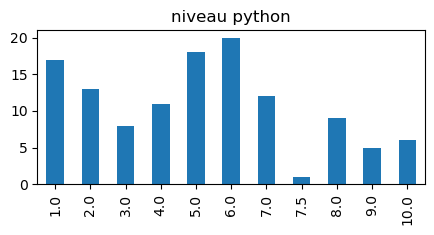

In [27]:
data["niveau_python"].value_counts().sort_index().plot(kind='bar',figsize=(5,2),title="niveau python")

<AxesSubplot:title={'center':'niveau r'}>

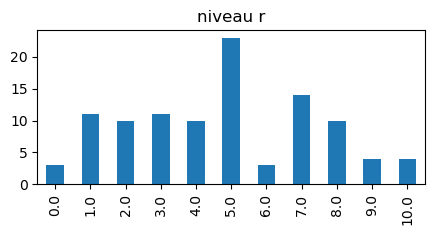

In [28]:
data["niveau_r"].value_counts().sort_index().plot(kind='bar',figsize=(5,2),title="niveau r")

## Jupyter

Exploration un peu plus poussée car résultats présentés lors de Jupytercon 2023

Toutes les questions 

- "Connaissez-vous les Carnets interactifs (notebook) : par exemple Jupyter, Rmarkdown, Google Colab ? ": "entendu_jupyter"
- "Avez-vous d\u00e9j\u00e0 utilis\u00e9 des Carnets interactifs (Jupyter ou Google Colab) ? ": "usage_jupyter"
- "Jupyter": "notebook_Jupyter", "Google Colab": "notebook_Google Colab", "Autre.1": "notebook_Autre.1"
- "Quelle est votre familiarit\u00e9 avec les Carnets interactifs ?": "familiarite_notebook"
- "Avez-vous d\u00e9j\u00e0 eu au moins une exp\u00e9rience de travail qui utilisait des Carnets interactifs ? ": "experience_notebook"
- "Comment situez-vous votre pratique  sur une \u00e9chelle de 1 \u00e0 10 (L\u00e9gende : de 1 - grand d\u00e9butant, \u00e0  10 - utilisateur avanc\u00e9 ou expert en passant par 5 - utilisateur autonome) ? .2": "niveau_notebook"
- "Pourriez-vous d\u00e9crire votre exp\u00e9rience ? ": "pratique_notebook", "Nous sommes \u00e0 la recherche d'exemples pour faciliter le partage de ces pratiques, donc si possible, indiquez le nom du / des projets ? .2": "exemple_notebook"
- "Depuis combien de temps utilisez-vous des Carnets interactifs dans le cadre de vos travaux ?": "temps_notebook"
- "Connaissez-vous ou collaborez-vous avec des coll\u00e8gues utilisant des Carnets interactifs dans le cadre de leurs recherches ?   ": "collegue_notebook"
- " Quels sont les principaux traitements que vous r\u00e9alisez \u00e0 l'aide des des Carnets interactifs dans le cadre de vos recherches ? Listez les traitements les plus fr\u00e9quents en quelques mots.": "traitement_notebook"
- "Quel(s) type(s) de solution(s) des Carnets interactifs vous utilisez (Google Colab, installation locale ou autre) ?   ": "type_notebook"
- "Quelles sont les ressources (formation en-ligne, cours en pr\u00e9sentiel, manuels, tutoriels) que vous trouvez les plus utiles pour l'utilisation des Carnets interactifs pour conseiller \u00e0 un coll\u00e8gue qui voudrait d\u00e9buter ?": "ressources_notebook"

In [33]:
pyshs.tri_a_plat(data,"entendu_jupyter")

,Effectif,Pourcentage (%)
"Non, je ne connais pas",56.0,27.2
"Oui, je connais",150.0,72.8
Total,206.0,100.0


Parmi ceux qui connaissent

In [34]:
pyshs.tri_a_plat(data,"usage_jupyter")

,Effectif,Pourcentage (%)
Non,37.0,25.3
Oui,109.0,74.7
Total,146.0,100.0


In [92]:
t = pyshs.tableau_croise(data.fillna("0. Don't know"),"familiarite_notebook","collegue_notebook")
t.index.name = "Personnal use of Jupyter"
t.columns.name = "Colleagues using Jupyter"
t

Colleagues using Jupyter,0. Don't know,1. No,"2. Yes, a few","3. Yes, a lot",Total
Personnal use of Jupyter,,,,,
0. Don't know,58.0 (96.7%),0.0 (0.0%),2.0 (3.3%),0.0 (0.0%),60 (100%)
1. Heard about it,7.0 (23.3%),13.0 (43.3%),10.0 (33.3%),0.0 (0.0%),30 (100%)
2. Use it (beginner),2.0 (3.8%),14.0 (26.9%),32.0 (61.5%),4.0 (7.7%),52 (100%)
3. Use it (intermediary),1.0 (2.4%),5.0 (12.2%),22.0 (53.7%),13.0 (31.7%),41 (100%)
4. Use it (advanced),0.0 (0.0%),3.0 (13.0%),10.0 (43.5%),10.0 (43.5%),23 (100%)
Total,68.0 (33.0%),35.0 (17.0%),76.0 (36.9%),27.0 (13.1%),206 (100%)


In [10]:
pyshs.tri_a_plat(data.fillna("NA"),"usage_jupyter")

,Effectif,Pourcentage (%)
NA,60.0,29.1
Non,37.0,18.0
Oui,109.0,52.9
Total,206.0,100.0


In [35]:
pd.concat({"Jupyter":pyshs.tri_a_plat(data.fillna("NA"),"notebook_Jupyter"),
"Colab":pyshs.tri_a_plat(data.fillna("NA"),"notebook_Google Colab"),
"Autre":pyshs.tri_a_plat(data.fillna("NA"), "notebook_Autre.1")},axis=1)

Jupyter                    Colab                    Autre  \
      Effectif Pourcentage (%) Effectif Pourcentage (%) Effectif   
NA       103.0            50.0    156.0            75.7    177.0   
X        103.0            50.0     50.0            24.3     29.0   
Total    206.0           100.0    206.0           100.0    206.0   

                       
      Pourcentage (%)  
NA               85.9  
X                14.1  
Total           100.0

In [36]:
t1 = pyshs.tri_a_plat(data,"familiarite_notebook")
t1.columns = ["N","%"]
t1.index.name = "Jupyter"
t1

,N,%
Jupyter,,
0. Don't know,60.0,29.1
1. Heard about it,30.0,14.6
2. Use it (beginner),52.0,25.2
3. Use it (intermediary),41.0,19.9
4. Use it (advanced),23.0,11.2
Total,206.0,100.0


In [37]:
t2 = pyshs.tri_a_plat(data.fillna("1. No"),"experience_notebook")
t2.columns = ["N","%"]
t2.index.name = "type of use"
t2

,N,%
type of use,,
1. No,103.0,50.0
2. Only research,55.0,26.7
3. Only teaching,13.0,6.3
4. Teaching and research,35.0,17.0
Total,206.0,100.0


In [38]:
t3 = pyshs.tri_a_plat(data,"temps_notebook")
t3.index.name = "using it since (year)"
t3.columns = ["N","%"]
t3

,N,%
using it since (year),,
0-3,96.0,72.7
3-5,23.0,17.4
5-10,13.0,9.8
Total,132.0,99.9


### Tableau résumé

In [39]:
pd.concat({"Jupyter":t1,"Use":t2,"Since":t3})

N      %
Jupyter 0. Don't know              60.0   29.1
        1. Heard about it          30.0   14.6
        2. Use it (beginner)       52.0   25.2
        3. Use it (intermediary)   41.0   19.9
        4. Use it (advanced)       23.0   11.2
        Total                     206.0  100.0
Use     1. No                     103.0   50.0
        2. Only research           55.0   26.7
        3. Only teaching           13.0    6.3
        4. Teaching and research   35.0   17.0
        Total                     206.0  100.0
Since   0-3                        96.0   72.7
        3-5                        23.0   17.4
        5-10                       13.0    9.8
        Total                     132.0   99.9

In [35]:
t,p = pyshs.tableau_croise(data,"age","familiarite_notebook",p=True)
print(p)
t

0.008943704965512169


,0. Don't know,1. Heard about it,2. Use it (beginner),3. Use it (intermediary),4. Use it (advanced),5. Don't know,Total
1. <25,2.0 (10.5%),2.0 (10.5%),4.0 (21.1%),9.0 (47.4%),2.0 (10.5%),0.0 (0.0%),19 (100%)
2. 26 - 35,19.0 (23.8%),14.0 (17.5%),23.0 (28.8%),14.0 (17.5%),10.0 (12.5%),0.0 (0.0%),80 (100%)
3. 36 - 45,16.0 (31.4%),6.0 (11.8%),10.0 (19.6%),10.0 (19.6%),9.0 (17.6%),0.0 (0.0%),51 (100%)
5. 46 - 55,10.0 (25.6%),6.0 (15.4%),14.0 (35.9%),6.0 (15.4%),2.0 (5.1%),1.0 (2.6%),39 (100%)
5. >56,12.0 (70.6%),2.0 (11.8%),1.0 (5.9%),2.0 (11.8%),0.0 (0.0%),0.0 (0.0%),17 (100%)
Total,59.0 (28.6%),30.0 (14.6%),52.0 (25.2%),41.0 (19.9%),23.0 (11.2%),1.0 (0.5%),206 (100%)


<Axes: >

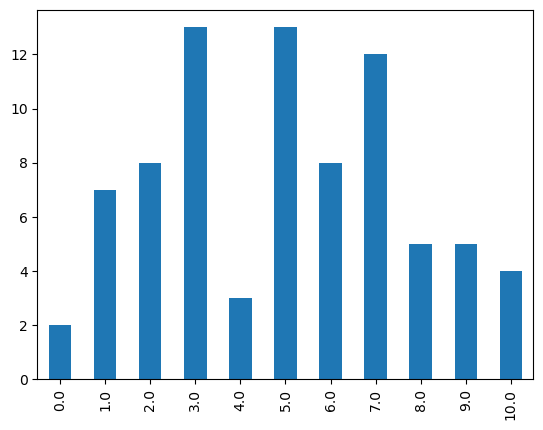

In [22]:
data["niveau_notebook"].value_counts().sort_index().plot(kind="bar")

Résumé : 

- Uniquement expérimenté lors du suivi de formation et de cours
- Publication des résultats de recherche sous forme de JupyterNotebook
- Exploration des données
- Réutilisation de notebooks créés par d'autres (informaticiens)
- workflow complet
- améliorer la documentation des scripts
- pour la réalisation des preuves de concepts
- uniquement pour les petits scripts
- former les stagiaires dans l'équipe
- support du travail collaboratif

Profil du support unique : 

Très utile pour de très nombreux usages (globalement, je n'utilise presque que cela) :   - Exploration et prototypage (statistiques, dataviz, etc.)   - Production de rapports (Markdown + LaTeX pour la mise en forme des équations et notations mathématiques)   - Slides de présentation (en remplacement de PowerPoint)   - Manipulation de données (en remplacement d'un tableur type Excel)   - L'enseignement et la formation (très utile par son caractère interactif et facile à prendre en main)   - Serveur et partage (facile de mettre en place un serveur Jupyter pour des usages collaboratifs ou pour mettre en place des espaces de travail pour des formations)

In [69]:
data[data["pratique_notebook"].str.contains("Très utile pour de très nombreux usages").fillna(False)].iloc[0][0:20]

heure                  27/03/2023 - 20:04
genre                                   H
statut                 Ingénieur d'études
autre                                 NaN
contrat               Non titulaire (CDD)
age                            2. 26 - 35
disc_Anthropologie                    NaN
disc_Archéologie                      NaN
disc_Economie                         NaN
disc_Géographie                         X
disc_Histoire                           X
disc_Linguistique                     NaN
disc_Littérature                      NaN
disc_Philosophie                      NaN
disc_Psychologie                      NaN
disc_Sociologie                       NaN
disc_Autre                            NaN
prog_A+                               NaN
prog_Bash                               X
prog_C                                NaN
Name: 87, dtype: object

In [94]:
d.str.lower().str.contains("reproduc").sum()

1

In [39]:
d = data[["pratique_notebook","traitement_notebook"]].apply(lambda x : "||".join([str(j) for j in x]),axis=1)\
.replace("nan||nan",None).dropna().str.replace("\n"," ").str.replace("\r"," ")
d.to_csv("pratiques_nb.csv")
for i in list(d):
    print(i,"\n")

Publication des résultats de recherche sous forme de JupyterNotebook||- 

C'est le principal support que j'utilise||nan 

exploration de données||nan 

nan||Je génère des documents HTML en Rmardown, mais n'utilise pas de carnets interactifs 

nan||Supports d'enseignement   Analyse de données   Apprentissage automatique 

Suivi de cours en ligne (programmation Python sur Udemy)   Suivi de webinaires (séminaire PHN-AHN laboratoire Larhra 2020)   BSO (réutilisation de carnets déjà réalisés)   Scrapping de données (MIAR)||nan 

Tentative d'utilisation dans le cadre d'un cours open classroom. Pour l'instant, je n'y ai pas donné suite.||nan 

workflow complet de la collecte à la publication à partir de Rmarkdown||idem 

nan||Exécution du code python.   Support de cours. 

Après quelques scripts directement en texte, j'ai découvert les Jupyter Notebooks qui sont extrêmement pratiques pour documenter le code, le séparer en plusieurs pipelines, n'exécuter que certaines parties. Je n'ai pas d'us

le professeur s'en servait pour faire les TD. C'était une catastrophe:    D'une part si on suit ce qu'il fait sur l'écran on ne peut pas prendre de notes ni reproduire ce qu'il fait sur son propre notebook,   D'autre part le fichier fourni est différent de celui discuté en cours ( puisque le professeur le modifie au fur et à mesure du "TD"). On n'a donc aucun repère, aucune référence.   La cata a été quand on s'est apperçu que le prof faisait ces TD à la place du cours.On n'avait donc absolument aucun matériel pour réviser à la fin de la présentation. EXTREMEMENT DEMORALISANT. Et comme le prof croit qu'on est dans sa tete, il ne veut pas fournir autre chose.